In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Basics
import tensorflow as tf
import pandas as pd
import xarray as xr

# Helpful
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt

# My Methods
from src.utils.CRPS import *  # CRPS metrics
from src.utils.data_split import *  # Splitting data into X and y
from src.utils.drn_make_X_array import *  # Import make train array functions (make_X_array)
from src.models.EMOS import *  # EMOS implementation
from src.models.DRN.DRN_model import *  # DRN implementation
from src.models.DRN.DRN_load_score import *  # Load DRN_scores
from src.models.DRN.DRN_load_model import *  # Load Models
from src.models.DRN.DRN_train import *
from src.models.EMOS_local.EMOS_local_load_score import *  # Load EMOS_local_scores
from src.models.EMOS_global.EMOS_global_load_score import *  # Load EMOS_global_scores
from src.models.EMOS_global.EMOS_global_load_model import *  # Load EMOS_global_models#
import data.raw.load_data_raw as ldr  # Load raw data
import data.processed.load_data_processed as ldp  # Load processed data normed
import data.processed.load_data_processed_denormed as ldpd  # Load processed data denormed
from src.models.CRPS_baseline.CRPS_load import *  # Load CRPS scores

2023-06-13 16:12:42.378863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/anaconda3/lib/
2023-06-13 16:12:42.378899: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<IPython.core.display.Javascript object>

### 1. Loading Scores

In [4]:
# Baseline Scores
CRPS_baseline_scores_ws10 = crps_load_lead_lat_lon("ws10")

# Global Scores:
EMOS_glob_scores_ws10 = EMOS_global_load_score("ws10")

# Local Scores:
EMOS_loc_scores_ws10 = EMOS_local_load_score("ws10")

# DRN scores
DRN_scores_ws10 = DRN_load_score("ws10")
# All same shape: len(31) -> shape (31, 120, 130)

<IPython.core.display.Javascript object>

### 2. Heamap

In [13]:
def heatmap_lead(var_name, lead_time, models=[True, True, True, True]):
    """
    Plots the specified number of heatmaps of the scores for a specified lead time
Args:
    var_name (str): variable to use 
    lead_time (int): Lead time 0 - 30
    models (list): Boolean list determining which models to plot
Returns:
    None
    """
    # Load lead_time specific scores
    load_funcs = [
        crps_load_lead_lat_lon,
        EMOS_global_load_score,
        EMOS_local_load_score,
        DRN_load_score,
    ]
    all_mean_scores = []
    for count, boolean in enumerate(models):
        if boolean:
            all_mean_scores.append(load_funcs[count](var_name)[lead_time])
    # All same shape: 120x130

    # Decide on labels
    labels_all = ["CRPS_baseline", "EMOS_glob", "EMOS_loc", "DRN"]
    labels_models = []
    for count, boolean in enumerate(models):
        if boolean:
            labels_models.append(labels_all[count])

    # Plot heat maps
    fig, axs = plt.subplots(len(all_mean_scores), 1, figsize=(25, 15))
    for model in range(len(all_mean_scores)):
        im = axs[model].imshow(all_mean_scores[model], cmap="viridis")
        fig.colorbar(
            im, ax=axs[model], label="your label"
        )  # add colorbar to the figure and associate it with the axis
        axs[model].set_title(
            f"Colormap {labels_models[model]} score, lead_time {lead_time}"
        )
    plt.show()

<IPython.core.display.Javascript object>

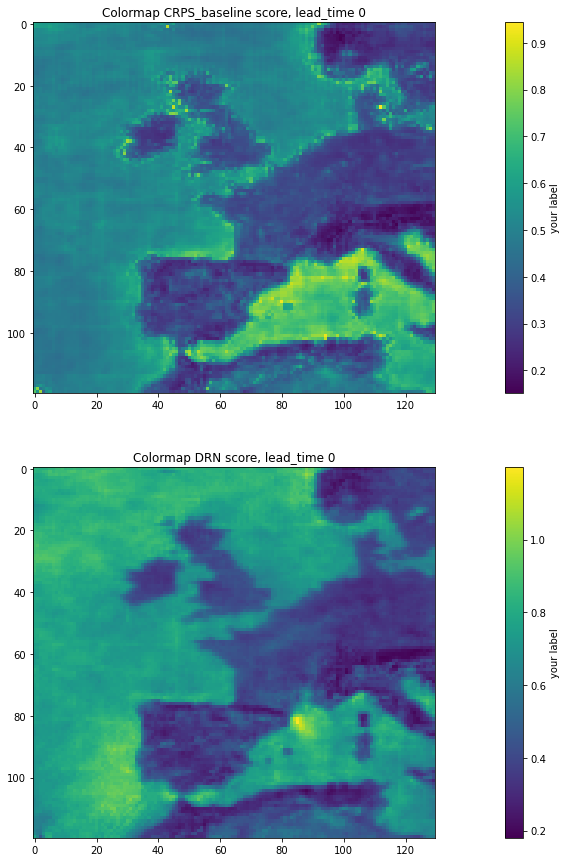

<IPython.core.display.Javascript object>

In [16]:
heatmap_lead("ws10", 0, models=[True, False, False, True])

### 3. Distribution

In [42]:
def histogram_lead(var_name, lead_time, models=[True, True, True, True]):
    """
    Plots the specified number of histograms for a specified lead time
    Args:
        var_name (str): variable to use 
        lead_time (int): Lead time 0 - 30
        models (list): Boolean list determining which models to plot
    Returns:
        None
    """
    # Load lead_time specific scores
    load_funcs = [
        crps_load_lead_lat_lon,
        EMOS_global_load_score,
        EMOS_local_load_score,
        DRN_load_score,
    ]
    all_scores = []
    for count, boolean in enumerate(models):
        if boolean:
            all_scores.append(load_funcs[count](var_name)[lead_time].flatten())
    # All same shape: 120x130

    # Decide on labels
    labels_all = ["CRPS_baseline", "EMOS_glob", "EMOS_loc", "DRN"]
    labels_models = []
    for count, boolean in enumerate(models):
        if boolean:
            labels_models.append(labels_all[count])

    # Decide on colors
    colors = ['blue', 'green', 'red', 'purple']
    model_colors = [color for color, model in zip(colors, models) if model]

    # Plot histograms
    fig, axs = plt.subplots(len(all_scores), 1, figsize=(10, 5*len(all_scores)))
    bins = np.arange(0, 1.4, 0.05) # Creating bin range with 0.2 width

    for model in range(len(all_scores)):
        axs[model].hist(all_scores[model], bins, color=model_colors[model], alpha=0.7)
        axs[model].set_title(
            f"Histogram {labels_models[model]} score, lead_time {lead_time}"
        )
    plt.tight_layout()
    plt.show()


<IPython.core.display.Javascript object>

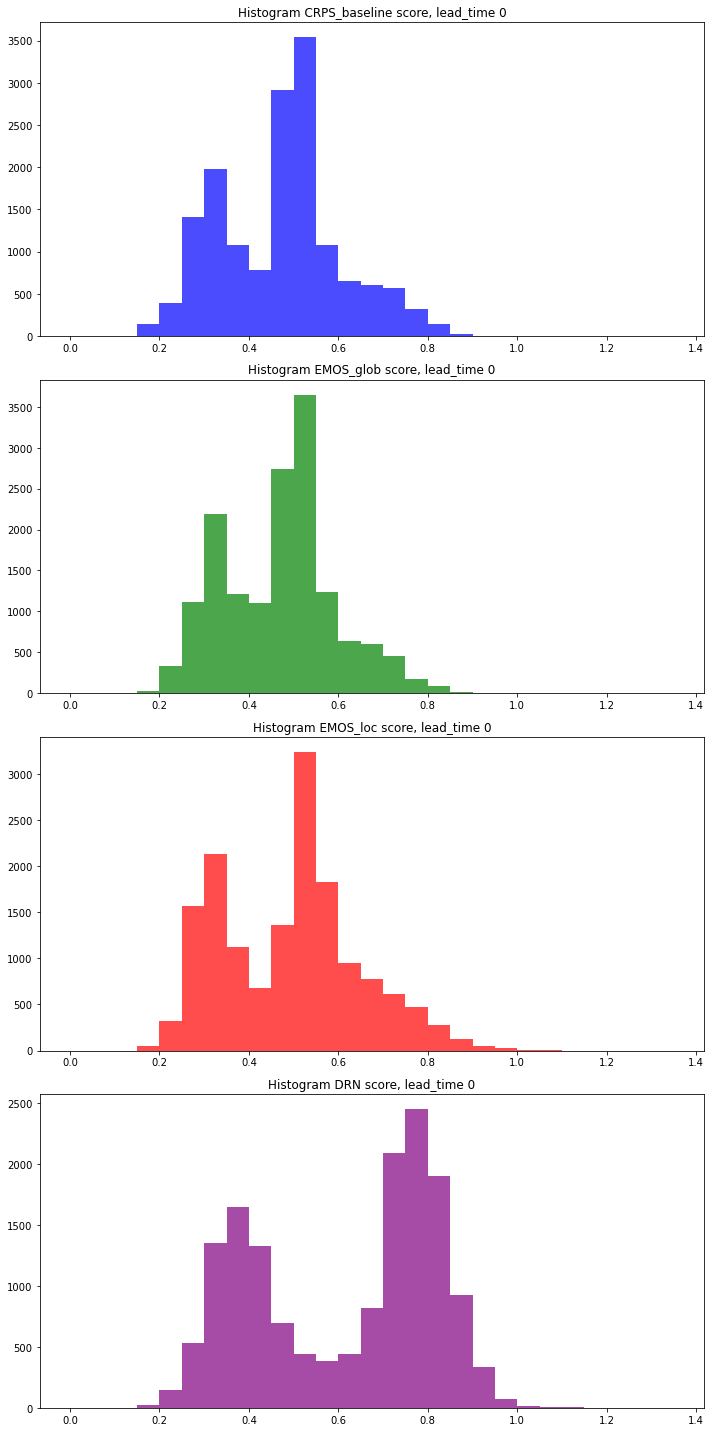

<IPython.core.display.Javascript object>

In [43]:
histogram_lead("ws10", 0, models=[True, True, True, True])